In [2]:
import numpy as np
import torch
import subprocess
import matplotlib.pyplot as plt

In [2]:
scenarios = ["classic","coin-heaven","loot-crate"]
me = "forth_agent"
command = "python main.py play --scenario {} --agents {} --n-rounds {} --train 0 --continue-without-training --no-gui --save-stats"
rounds = 100

In [7]:
agents = f"{me} peaceful_agent coin_collector_agent"
scenario = "classic"
a = subprocess.call(command.format(scenario,agents,rounds).split(" "))

100%|██████████| 100/100 [01:14<00:00,  1.34it/s]


In [4]:
# run tests:


for scenario in scenarios:
    agents = f"{me} rule_based_agent"
    a = subprocess.call(command.format(scenario,agents,rounds).split(" "))

for scenario in scenarios:
    agents = f"{me} rule_based_agent rule_based_agent rule_based_agent"
    a = subprocess.call(command.format(scenario,agents,rounds).split(" "))




100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


In [12]:
agents = f"{me} rule_based_agent rule_based_agent rule_based_agent"
command = "python main.py play --scenario {} --agents {} --n-rounds {} --train 0 --continue-without-training --no-gui --save-stats"
rounds = 1000
a = subprocess.call(command.format("classic",agents,rounds).split(" "))

100%|██████████| 1000/1000 [13:03<00:00,  1.28it/s]


[3.77333333 3.77666667 2.99333333 3.37666667 3.07666667]


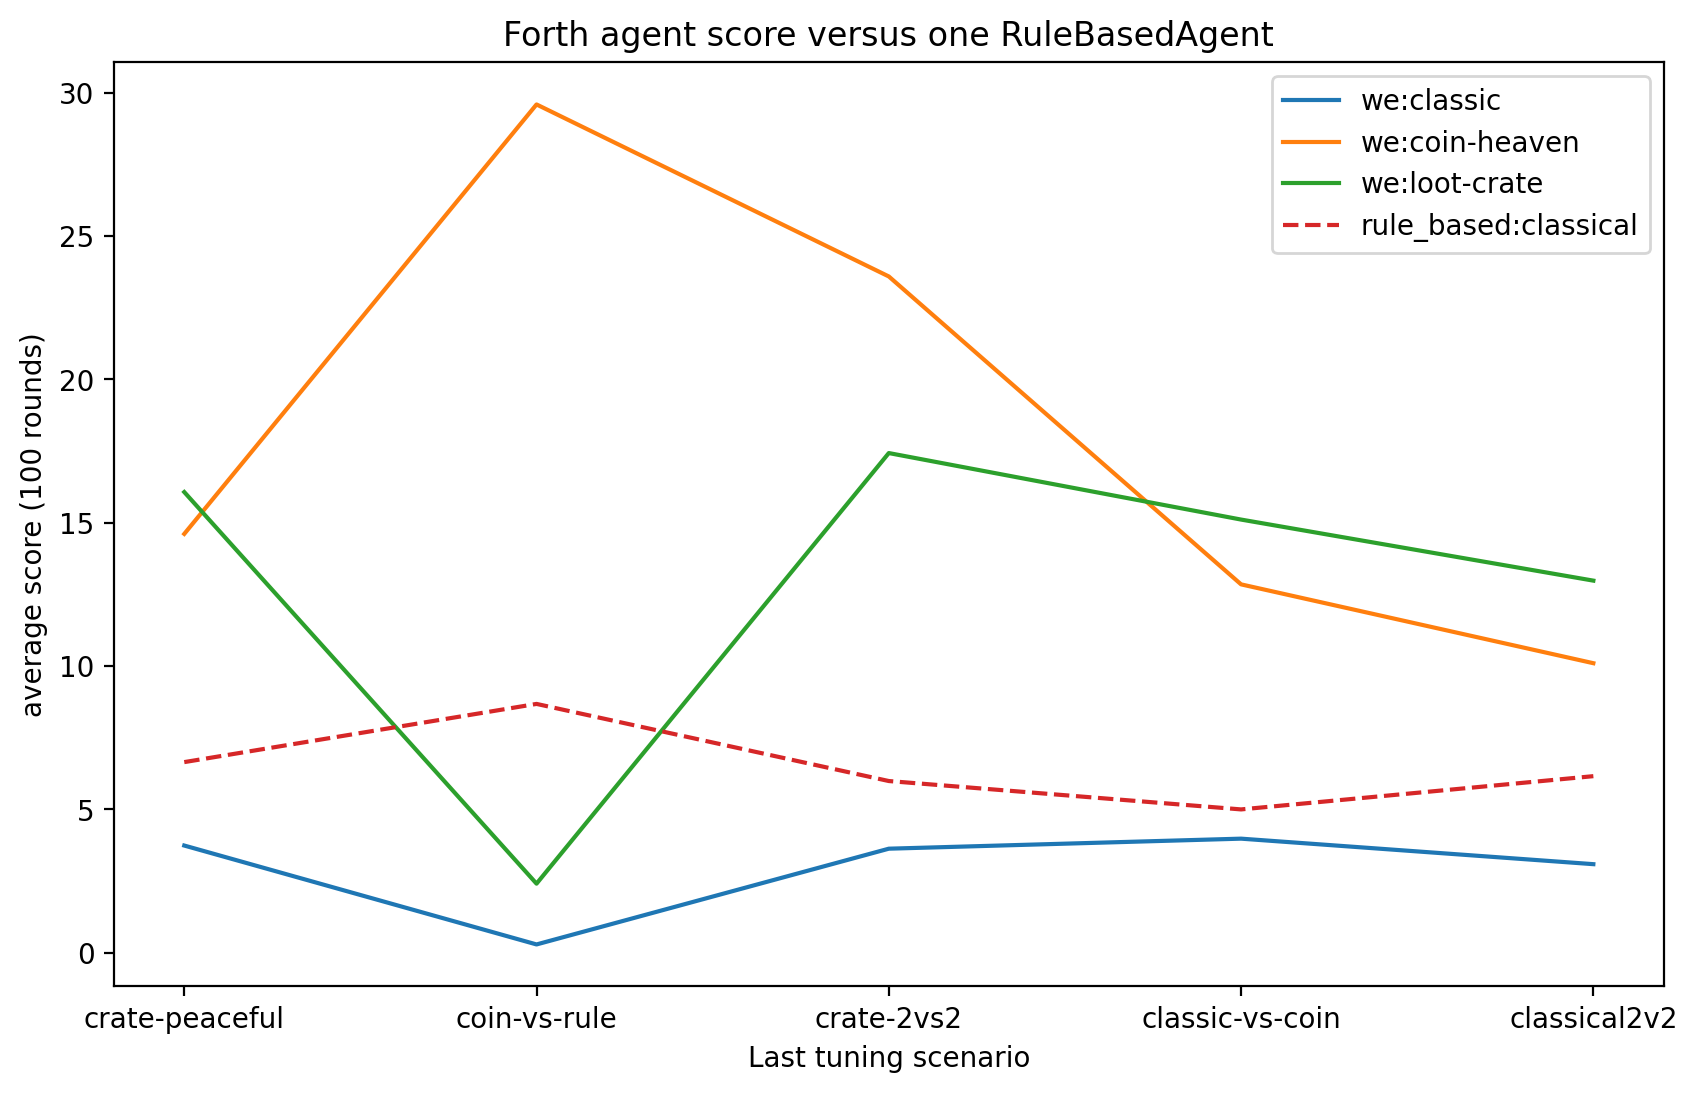

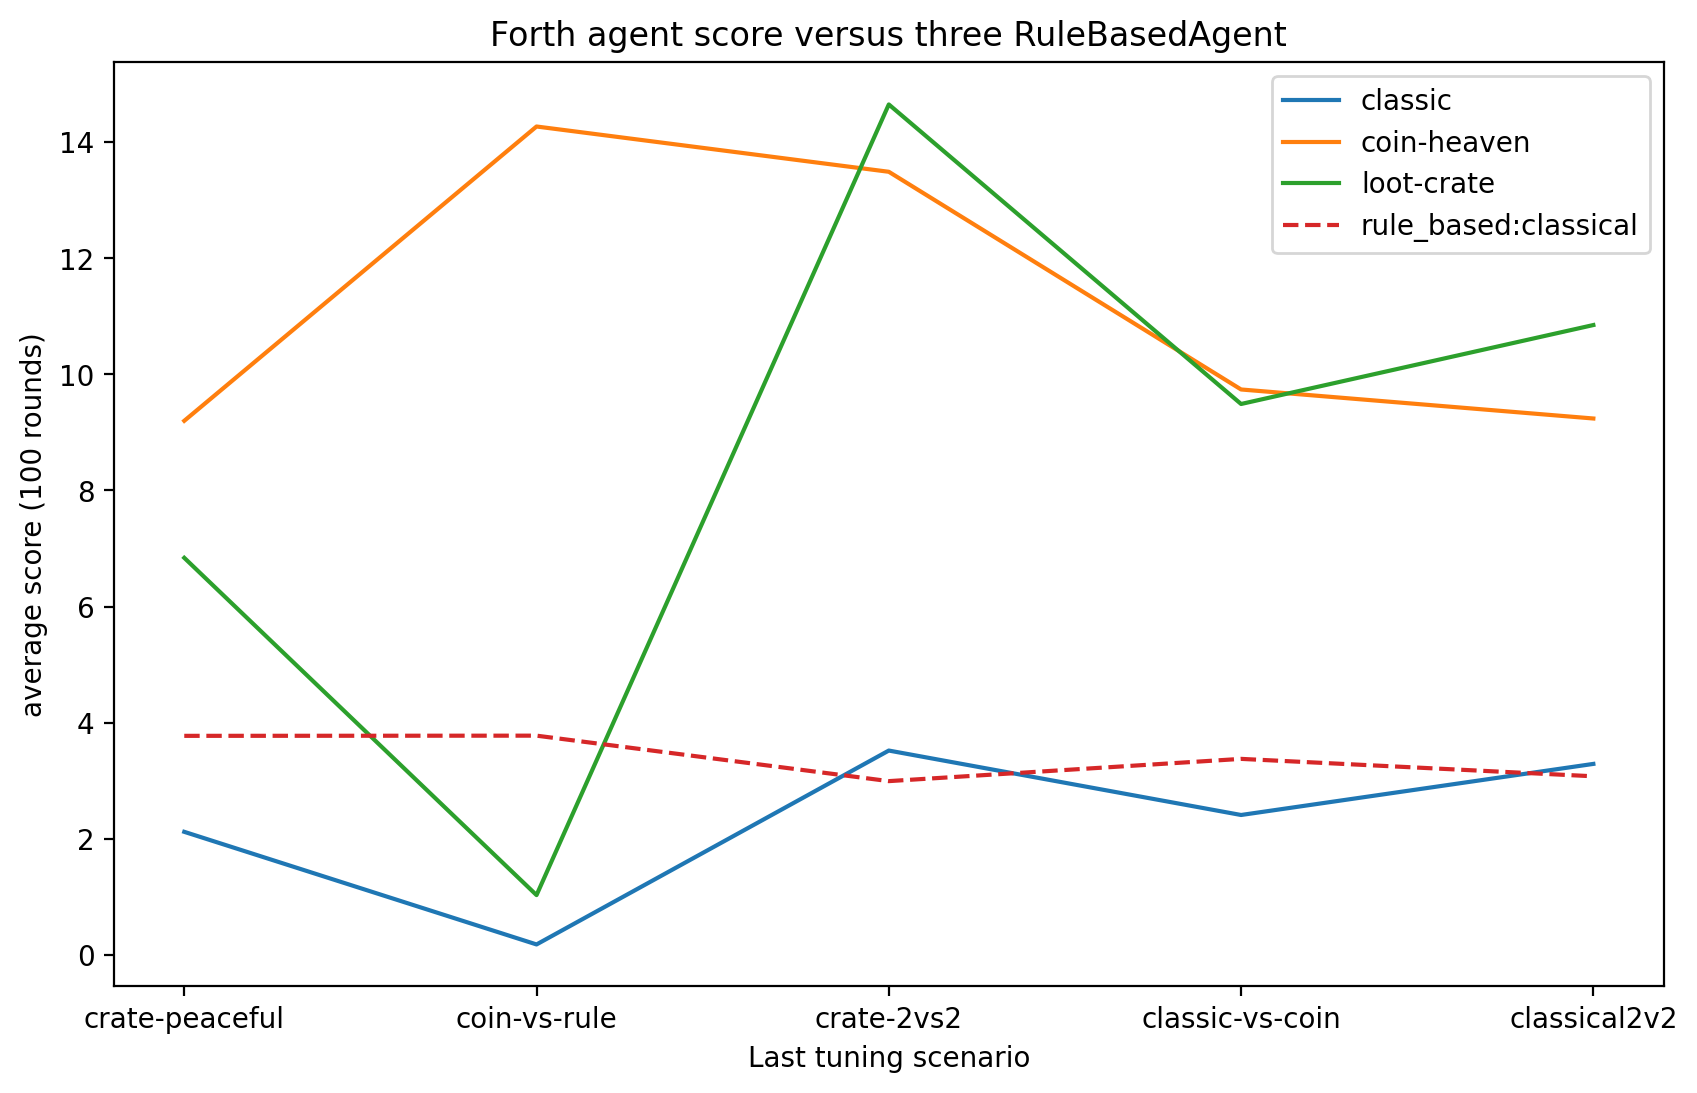

In [6]:
x = ["crate-peaceful","coin-vs-rule","crate-2vs2","classic-vs-coin","classical2v2"]
# our scores with one opponent
classic_one = np.array([374,29,363,398,309]) / 100
heaven_one =np.array( [1461,2959,2359,1285,1010])/ 100
loot_one = np.array([1607,241,1743,1511,1298])/ 100

# the opponents scores on classic
ops_classical_one = np.array([665,868,599,500,616]) /100


classic =np.array( [212,18,352,241,329])/ 100
heaven = np.array([920,1427,1349,974,924])/ 100
loot = np.array([684,103,1465,949,1085])/ 100

ops_classical= np.array([[428,383,321],[385,356,392],[297,320,281],[334,353,326],[296,317,310]]).mean(axis=1) / 100
print(ops_classical )

plt.figure(figsize=(10, 6),dpi=200)
plt.plot(x,classic_one,label="we:classic")
plt.plot(x,heaven_one,label="we:coin-heaven")
plt.plot(x,loot_one,label="we:loot-crate")
plt.plot(x,ops_classical_one,label="rule_based:classical",linestyle="dashed")
plt.title("Forth agent score versus one RuleBasedAgent")
plt.xlabel("Last tuning scenario")
plt.ylabel("average score (100 rounds)")
plt.legend()
plt.show()
plt.figure(figsize=(10, 6),dpi=200)
plt.plot(x,classic,label="classic")
plt.plot(x,heaven,label="coin-heaven")
plt.plot(x,loot,label="loot-crate")
plt.plot(x,ops_classical,label="rule_based:classical",linestyle="dashed")
plt.title("Forth agent score versus three RuleBasedAgent")
plt.xlabel("Last tuning scenario")
plt.ylabel("average score (100 rounds)")
plt.legend()
plt.show()
# We just smoked the ops!!

In [10]:
#task3:
pre_tune = 358 /100
post_tune = 603 /100
post_classic_tune = 331 / 100 # even worse

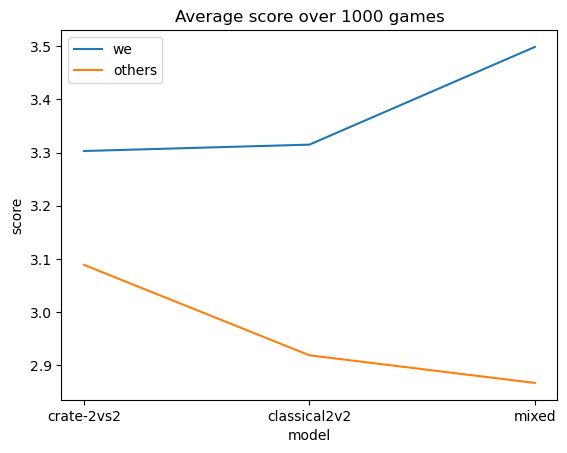

In [3]:
# compare two models: (3 and 5 from the chart above)


#crate2v2 
x = ["crate-2vs2","classical2v2","mixed"]
we = 3303 /1000# last trained on 
other_average = np.array([3008,3138,3120]).mean() / 1000

#classical2v2:
we2 = 3315 /1000
other_average2= np.array([2799,3101,2855]).mean() / 1000

# mixed
we3 = 3499 / 1000
other_average3 = np.array([2904,2806,2889]).mean() / 1000
plt.plot(x,[we,we2,we3],label="we")
plt.plot(x,[other_average,other_average2,other_average3],label="others")
plt.xlabel("model")
plt.ylabel("score")
plt.title("Average score over 1000 games")
plt.legend()